# Variability due to dynamical or property change?

In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

1. [Functions](##-Functions)
2. [Upwelling](##-Upwelling)
3. [Downwelling](##-Downwelling)
4. [Test with observations](##-Test-with-Observations)

## Functions

In [42]:
def means(s_t, do_no3, ta_dic):
    # make dictionary of mean transport and tracer concentrations of each WM and of JdF inflow

    # set up dictionary
    # for each variable, saved in the order total -> loop -> fresh -> south -> cuc -> off_d -> off_s -> north
    d = {'section':['total', 'loop', 'fresh', 'south', 'cuc', 'off_d', 'off_s', 'north'],
        'transport':np.zeros(8),'salt':np.zeros(8),'temp':np.zeros(8),
         'DO':np.zeros(8),'NO3':np.zeros(8),'TA':np.zeros(8),'DIC':np.zeros(8)}
    df = pd.DataFrame(d)

    # hours over which data was integrated
    start = 2401
    length =(np.max(s_t.init_t)-start+1) 

    # boundary definitions
    bdy_loo = 0
    bdy_sou = 2
    bdy_off = 3
    bdy_nor = 4

    saltdiv = 32
    sdiv = 33.5

    
    # total
    mydata= s_t
    boolean = ((abs(mydata.init_t-mydata.final_t) > 24) & ~np.isnan(mydata.final_section)) # total.. but not including tidal pumping or lost particles
    transport = mydata.init_transp[boolean].values
    df.loc[0,'transport'] = np.sum(transport)/length
    df.loc[0,'salt'] = np.average(mydata.init_salt[boolean], weights = transport)
    df.loc[0,'temp'] = np.average(mydata.init_temp[boolean], weights = transport)
    mydata = do_no3
    df.loc[0,'NO3'] = np.average(mydata.init_salt[boolean], weights = transport)
    df.loc[0,'DO'] = np.average(mydata.init_temp[boolean], weights = transport)
    mydata = ta_dic
    df.loc[0,'DIC'] = np.average(mydata.init_salt[boolean], weights = transport)
    df.loc[0,'TA'] = np.average(mydata.init_temp[boolean], weights = transport)

    # loop
    mydata= s_t
    boolean = (mydata.final_section==bdy_loo) & (abs(mydata.init_t-mydata.final_t) > 24)
    transport = mydata.init_transp[boolean].values
    df.loc[1,'transport'] = np.sum(transport)/length
    df.loc[1,'salt'] = np.average(mydata.final_salt[boolean], weights = transport)
    df.loc[1,'temp'] = np.average(mydata.final_temp[boolean], weights = transport)
    mydata = do_no3
    df.loc[1,'NO3'] = np.average(mydata.final_salt[boolean], weights = transport)
    df.loc[1,'DO'] = np.average(mydata.final_temp[boolean], weights = transport)
    mydata = ta_dic
    df.loc[1,'DIC'] = np.average(mydata.final_salt[boolean], weights = transport)
    df.loc[1,'TA'] = np.average(mydata.final_temp[boolean], weights = transport) 

    # fresh
    mydata= s_t
    boolean = ((mydata.final_section==bdy_sou) & (mydata.final_salt < saltdiv))
    transport = mydata.init_transp[boolean].values
    df.loc[2,'transport'] = np.sum(transport)/length
    df.loc[2,'salt'] = np.average(mydata.final_salt[boolean], weights = transport)
    df.loc[2,'temp'] = np.average(mydata.final_temp[boolean], weights = transport)
    mydata = do_no3
    df.loc[2,'NO3'] = np.average(mydata.final_salt[boolean], weights = transport)
    df.loc[2,'DO'] = np.average(mydata.final_temp[boolean], weights = transport)
    mydata = ta_dic
    df.loc[2,'DIC'] = np.average(mydata.final_salt[boolean], weights = transport)
    df.loc[2,'TA'] = np.average(mydata.final_temp[boolean], weights = transport)

    # south
    mydata= s_t
    boolean = (mydata.final_section==bdy_sou) & (mydata.final_salt >= saltdiv) & (mydata.final_salt < sdiv)
    transport = mydata.init_transp[boolean].values
    df.loc[3,'transport'] = np.sum(transport)/length
    df.loc[3,'salt'] = np.average(mydata.final_salt[boolean], weights = transport)
    df.loc[3,'temp'] = np.average(mydata.final_temp[boolean], weights = transport)
    mydata = do_no3
    df.loc[3,'NO3'] = np.average(mydata.final_salt[boolean], weights = transport)
    df.loc[3,'DO'] = np.average(mydata.final_temp[boolean], weights = transport)
    mydata = ta_dic
    df.loc[3,'DIC'] = np.average(mydata.final_salt[boolean], weights = transport)
    df.loc[3,'TA'] = np.average(mydata.final_temp[boolean], weights = transport)

    # cuc
    mydata= s_t
    boolean = (mydata.final_section==bdy_sou) & (mydata.final_salt >= sdiv)
    transport = mydata.init_transp[boolean].values
    df.loc[4,'transport'] = np.sum(transport)/length
    df.loc[4,'salt'] = np.average(mydata.final_salt[boolean], weights = transport)
    df.loc[4,'temp'] = np.average(mydata.final_temp[boolean], weights = transport)
    mydata = do_no3
    df.loc[4,'NO3'] = np.average(mydata.final_salt[boolean], weights = transport)
    df.loc[4,'DO'] = np.average(mydata.final_temp[boolean], weights = transport)
    mydata = ta_dic
    df.loc[4,'DIC'] = np.average(mydata.final_salt[boolean], weights = transport)
    df.loc[4,'TA'] = np.average(mydata.final_temp[boolean], weights = transport)

    # off_d
    mydata= s_t
    boolean = (mydata.final_section==bdy_off) & (mydata.final_depth > 120)
    transport = mydata.init_transp[boolean].values
    df.loc[5, 'transport'] = np.sum(transport)/length
    df.loc[5, 'salt'] = np.average(mydata.final_salt[boolean], weights = transport)
    df.loc[5, 'temp'] = np.average(mydata.final_temp[boolean], weights = transport)
    mydata = do_no3
    df.loc[5, 'NO3'] = np.average(mydata.final_salt[boolean], weights = transport)
    df.loc[5, 'DO'] = np.average(mydata.final_temp[boolean], weights = transport)
    mydata = ta_dic
    df.loc[5, 'DIC'] = np.average(mydata.final_salt[boolean], weights = transport)
    df.loc[5, 'TA'] = np.average(mydata.final_temp[boolean], weights = transport)

    # off_s
    mydata= s_t
    boolean = (mydata.final_section==bdy_off) & (mydata.final_depth <=120)
    transport = mydata.init_transp[boolean].values
    df.loc[6,'transport'] = np.sum(transport)/length
    df.loc[6,'salt'] = np.average(mydata.final_salt[boolean], weights = transport)
    df.loc[6,'temp'] = np.average(mydata.final_temp[boolean], weights = transport)
    mydata = do_no3
    df.loc[6,'NO3'] = np.average(mydata.final_salt[boolean], weights = transport)
    df.loc[6,'DO'] = np.average(mydata.final_temp[boolean], weights = transport)
    mydata = ta_dic
    df.loc[6,'DIC'] = np.average(mydata.final_salt[boolean], weights = transport)
    df.loc[6,'TA'] = np.average(mydata.final_temp[boolean], weights = transport)

    # north
    mydata= s_t
    boolean = (mydata.final_section==bdy_nor)
    transport = mydata.init_transp[boolean].values
    df.loc[7,'transport'] = np.sum(transport)/length
    df.loc[7,'salt'] = np.average(mydata.final_salt[boolean], weights = transport)
    df.loc[7,'temp'] = np.average(mydata.final_temp[boolean], weights = transport)
    mydata = do_no3
    df.loc[7,'NO3'] = np.average(mydata.final_salt[boolean], weights = transport)
    df.loc[7,'DO'] = np.average(mydata.final_temp[boolean], weights = transport)
    mydata = ta_dic
    df.loc[7,'DIC'] = np.average(mydata.final_salt[boolean], weights = transport)
    df.loc[7,'TA'] = np.average(mydata.final_temp[boolean], weights = transport)

    return df

def decomp(data,base):
    d = {'section':['total','loop', 'fresh', 'south', 'cuc', 'off_d', 'off_s', 'north'],
        'saltP':np.zeros(8),'saltQ':np.zeros(8),'saltSUM':np.zeros(8),
        'tempP':np.zeros(8),'tempQ':np.zeros(8),'tempSUM':np.zeros(8),
        'doP':np.zeros(8),'doQ':np.zeros(8),'doSUM':np.zeros(8),
        'taP':np.zeros(8),'taQ':np.zeros(8),'taSUM':np.zeros(8),
        'no3P':np.zeros(8),'no3Q':np.zeros(8),'no3SUM':np.zeros(8),
        'dicP':np.zeros(8),'dicQ':np.zeros(8),'dicSUM':np.zeros(8)}
    df = pd.DataFrame(d)

    # salt
    df['saltP'] = (data.salt[1:] - base.salt[1:])*(data.transport[1:]/data.transport[0])
    # (up22.salt[1:] - up_b.salt[1:])*(up22.transport[1:]/up22.transport[0])
    df['saltQ'] = ((data.transport[1:]/data.transport[0]) - (base.transport[1:]/base.transport[0]))*data.salt[1:]
    # ((up22.transport[1:]/up22.transport[0]) - (up_b.transport[1:]/up_b.transport[0]))*up22.salt[1:]
    df['saltSUM'] = df.saltP + df.saltQ

    # temp
    df['tempP'] = (data.temp[1:] - base.temp[1:])*(data.transport[1:]/data.transport[0])
    df['tempQ'] = ((data.transport[1:]/data.transport[0]) - (base.transport[1:]/base.transport[0]))*data.temp[1:]
    df['tempSUM'] = df.tempP + df.tempQ

    # do
    df['doP'] = (data.DO[1:] - base.DO[1:])*(data.transport[1:]/data.transport[0])
    df['doQ'] = ((data.transport[1:]/data.transport[0]) - (base.transport[1:]/base.transport[0]))*data.DO[1:]
    df['doSUM'] = df.doP + df.doQ

    # ta
    df['taP'] = (data.TA[1:] - base.TA[1:])*(data.transport[1:]/data.transport[0])
    df['taQ'] = ((data.transport[1:]/data.transport[0]) - (base.transport[1:]/base.transport[0]))*data.TA[1:]
    df['taSUM'] = df.taP + df.taQ

    # dic
    df['dicP'] = (data.DIC[1:] - base.DIC[1:])*(data.transport[1:]/data.transport[0])
    df['dicQ'] = ((data.transport[1:]/data.transport[0]) - (base.transport[1:]/base.transport[0]))*data.DIC[1:]
    df['dicSUM'] = df.dicP + df.dicQ

    # no3
    df['no3P'] = (data.NO3[1:] - base.NO3[1:])*(data.transport[1:]/data.transport[0])
    df['no3Q'] = ((data.transport[1:]/data.transport[0]) - (base.transport[1:]/base.transport[0]))*data.NO3[1:]
    df['no3SUM'] = df.no3P + df.no3Q

    return df

def stacked_bar(df, property):
    # Calculate absolute values
    df['absP'] = df[df.columns[2]].abs()
    df['absQ'] = df[df.columns[3]].abs()

    # Normalize the data within each year
    df['total_abs'] = df.groupby('year')[['absP', 'absQ']].transform('sum').sum(axis=1)
    df['normP'] = df['absP'] / df['total_abs']
    df['normQ'] = df['absQ'] / df['total_abs']

    # Aggregate normalized values by year and section
    agg_df = df.groupby(['year', 'section'])[['normP', 'normQ']].sum().reset_index()

    # Pivot the DataFrame for plotting
    pivotP = agg_df.pivot(index='year', columns='section', values='normP').fillna(0)
    pivotQ = agg_df.pivot(index='year', columns='section', values='normQ').fillna(0)

    # Plotting
    fig = plt.figure(constrained_layout=True, figsize=[8,6])
    gs = GridSpec(1, 5, figure=fig)
    ax = fig.add_subplot(gs[0, :4])
    ax2 = fig.add_subplot(gs[0, 4])

    # Assign colors to each section
    colors = ['midnightblue','magenta','mediumspringgreen','darkviolet','deepskyblue','red']#plt.cm.tab20(np.linspace(0, 1, len(pivotP.columns)))

    # Plot normalized saltP values (left side)
    left_cum_values = np.zeros(len(pivotP))
    for i, section in enumerate(pivotP.columns):
        bars = ax.barh(pivotP.index, -pivotP[section], left=-left_cum_values, color=colors[i % len(colors)], label=section)
        left_cum_values += pivotP[section]

    # Plot normalized saltQ values (right side)
    right_cum_values = np.zeros(len(pivotQ))
    for i, section in enumerate(pivotQ.columns):
        bars = ax.barh(pivotQ.index, pivotQ[section], left=right_cum_values, color=colors[i % len(colors)])
        right_cum_values += pivotQ[section]

    # Customize plot
    ax.axvline(0, color='grey', linewidth=2)
    ax.set_xlabel('Normalized Absolute Values')
    title = 'Contribution to change in ' + property
    ax.set_title(title)
    # ax.set_xlim(-0.1,1.1)
    ax.set_xticks([0,1])
    ax.invert_yaxis()
    ax.set_yticks(list(set(df.year)))

    ax2.sharey(ax)

    plt.tight_layout()

    return ax2

## Upwelling

In [3]:
up21 = means(xr.open_dataset('/data1/bbeutel/LO_user/ariane/up_cas7/S_T/20210922/ariane_positions_quantitative.nc'),
             xr.open_dataset('/data1/bbeutel/LO_user/ariane/up_cas7/DO_NO3/20210922/ariane_positions_quantitative.nc'),
             xr.open_dataset('/data1/bbeutel/LO_user/ariane/up_cas7/TA_DIC/20210922/ariane_positions_quantitative.nc'))
up21

,section,transport,salt,temp,DO,NO3,TA,DIC
0,total,175100.761758,33.437343,6.878566,89.066218,32.566350,2296.140886,2292.133090
1,loop,47892.743807,32.147956,8.268352,162.824418,29.531483,2235.363649,2198.926194
2,fresh,914.591989,30.001792,9.055838,308.683101,7.427832,2159.874902,1990.992429
3,south,6746.388401,32.942214,8.475358,186.544382,20.645642,2272.794101,2189.361709
4,cuc,42358.474133,33.872269,6.262225,63.342383,37.089241,2322.278085,2324.193676
5,off_d,37948.053324,33.758364,6.382110,88.199850,33.918284,2314.229495,2298.032249
6,off_s,5594.891591,32.803437,7.970548,220.395141,15.808643,2263.994608,2151.010730
7,north,33645.618513,33.190089,7.281880,158.181221,23.791523,2282.609135,2219.732483


In [4]:
up22 = means(xr.open_dataset('/data1/bbeutel/LO_user/ariane/up_cas7/S_T/20221015/ariane_positions_quantitative.nc'),
             xr.open_dataset('/data1/bbeutel/LO_user/ariane/up_cas7/DO_NO3/20221015/ariane_positions_quantitative.nc'),
             xr.open_dataset('/data1/bbeutel/LO_user/ariane/up_cas7/TA_DIC/20221015/ariane_positions_quantitative.nc'))
up22

,section,transport,salt,temp,DO,NO3,TA,DIC
0,total,183358.656226,33.418979,6.984773,84.578336,32.373358,2292.223650,2294.921888
1,loop,46232.389609,31.884409,8.864029,153.723608,28.829758,2220.301999,2190.337044
2,fresh,356.272486,29.036857,9.929378,317.042335,4.613243,2121.004952,1931.535035
3,south,11000.238644,33.246944,7.568788,132.822180,26.288885,2282.748814,2245.331530
4,cuc,64658.987936,33.829425,6.270541,69.999886,36.191345,2316.929993,2316.157508
5,off_d,21013.116560,33.627031,6.743327,104.803427,31.373453,2303.441332,2279.050300
6,off_s,14007.282971,32.829435,7.984797,210.462044,16.138737,2266.545205,2159.678746
7,north,26090.368020,32.955813,7.913972,178.795639,19.905506,2270.522609,2189.939819


In [5]:
# make 'baseline' dataframe based on the means of all the data
d = {'section':['total', 'loop', 'fresh', 'south', 'cuc', 'off_d', 'off_s', 'north'],
     'transport':np.mean([up21.transport,up22.transport],axis=0),
     'salt':np.mean([up21.salt,up22.salt],axis=0),
     'temp':np.mean([up21.temp,up22.temp],axis=0),
     'DO':np.mean([up21.DO,up22.DO],axis=0),
     'NO3':np.mean([up21.NO3,up22.NO3],axis=0),
     'TA':np.mean([up21.TA,up22.TA],axis=0),
     'DIC':np.mean([up21.DIC,up22.DIC],axis=0)}
up_b = pd.DataFrame(d)

up_b

,section,transport,salt,temp,DO,NO3,TA,DIC
0,total,179229.708992,33.428161,6.931670,86.822277,32.469854,2294.182268,2293.527489
1,loop,47062.566708,32.016182,8.566190,158.274013,29.180621,2227.832824,2194.631619
2,fresh,635.432238,29.519325,9.492608,312.862718,6.020537,2140.439927,1961.263732
3,south,8873.313522,33.094579,8.022073,159.683281,23.467264,2277.771457,2217.346620
4,cuc,53508.731034,33.850847,6.266383,66.671135,36.640293,2319.604039,2320.175592
5,off_d,29480.584942,33.692698,6.562719,96.501639,32.645868,2308.835414,2288.541275
6,off_s,9801.087281,32.816436,7.977673,215.428592,15.973690,2265.269907,2155.344738
7,north,29867.993267,33.072951,7.597926,168.488430,21.848515,2276.565872,2204.836151


In [7]:
# math! 
math_up21 = decomp(up21,up_b)[1:]
math_up22 = decomp(up22,up_b)[1:]

# add year 
math_up21['year'] = 2021
math_up22['year'] = 2022

/tmp/ipykernel_87713/2093005159.py:233: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


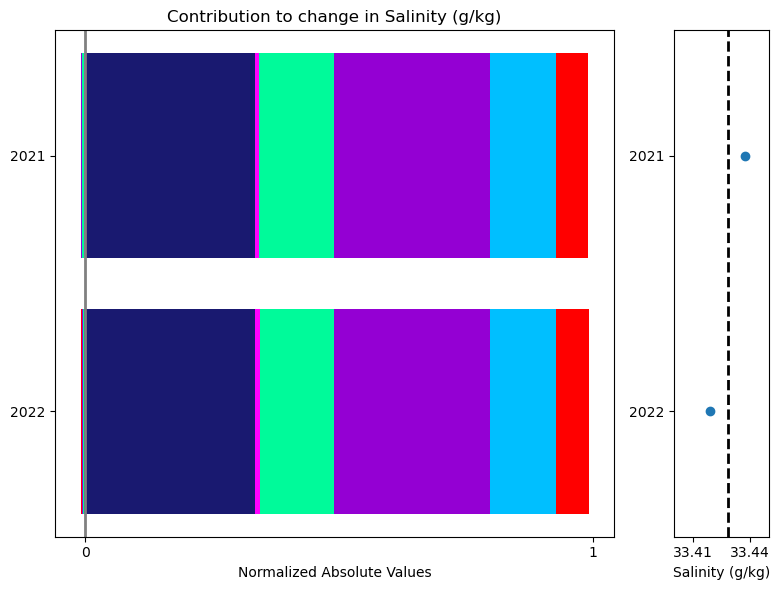

In [49]:
df = pd.concat([math_up21[['year','section','saltP','saltQ']][1:],math_up22[['year','section','saltP','saltQ']][1:]])
ax2 = stacked_bar(df,'Salinity (g/kg)')

# mean property inflow to JdF
ax2.scatter([up21.salt[0],up22.salt[0]], [2021,2022])
ax2.axvline(up_b.salt[0], color='k', ls='dashed', linewidth=2)
ax2.set_xlabel('Salinity (g/kg)')
ax2.set_xlim([33.4,33.45])
ax2.set_xticks([33.41,33.44])


/tmp/ipykernel_87713/2093005159.py:233: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


Text(0.5, 36.72222222222221, 'Temperature ($^\\circ C$)')

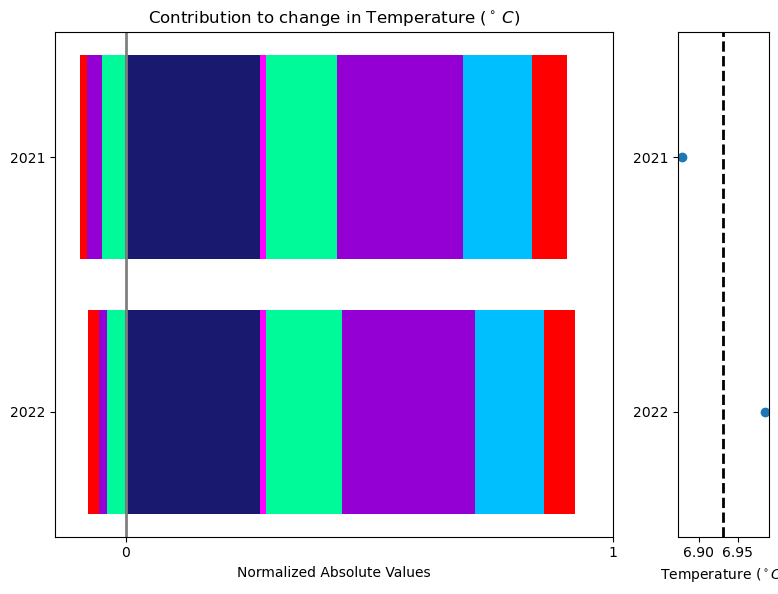

In [50]:
df = pd.concat([math_up21[['year','section','tempP','tempQ']][1:],math_up22[['year','section','tempP','tempQ']][1:]])
ax2 = stacked_bar(df,'Temperature ($^\circ \, C$)')

# mean property inflow to JdF
ax2.scatter([up21.temp[0],up22.temp[0]], [2021,2022])
ax2.axvline(up_b.temp[0], color='k', ls='dashed', linewidth=2)
ax2.set_xlabel('Temperature ($^\circ C$)')
# ax2.set_xlim([33.4,33.45])
# ax2.set_xticks([33.41,33.44])

/tmp/ipykernel_87713/2093005159.py:233: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


Text(0.5, 36.72222222222221, 'DO ()')

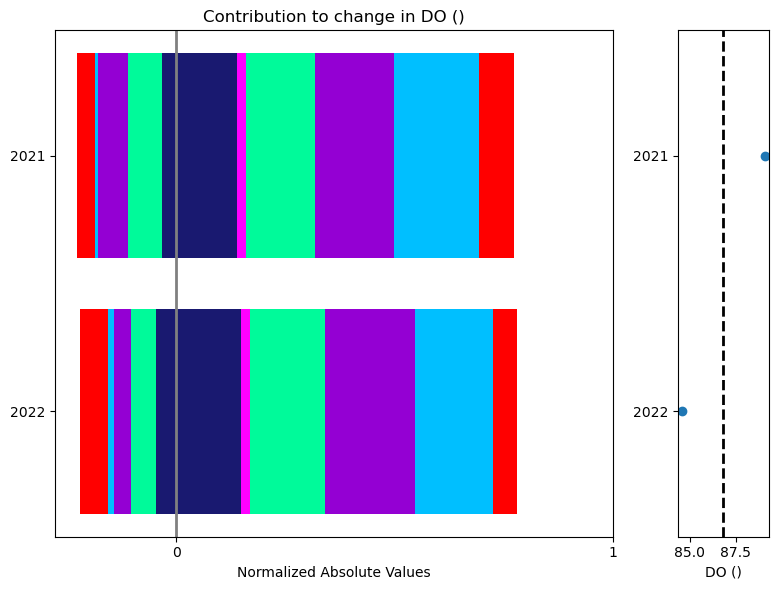

In [51]:
df = pd.concat([math_up21[['year','section','doP','doQ']][1:],math_up22[['year','section','doP','doQ']][1:]])
ax2 = stacked_bar(df,'DO ()')

# mean property inflow to JdF
ax2.scatter([up21.DO[0],up22.DO[0]], [2021,2022])
ax2.axvline(up_b.DO[0], color='k', ls='dashed', linewidth=2)
ax2.set_xlabel('DO ()')
# ax2.set_xlim([33.4,33.45])
# ax2.set_xticks([33.41,33.44])

/tmp/ipykernel_87713/2093005159.py:233: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


Text(0.5, 36.72222222222221, 'Nitrate ()')

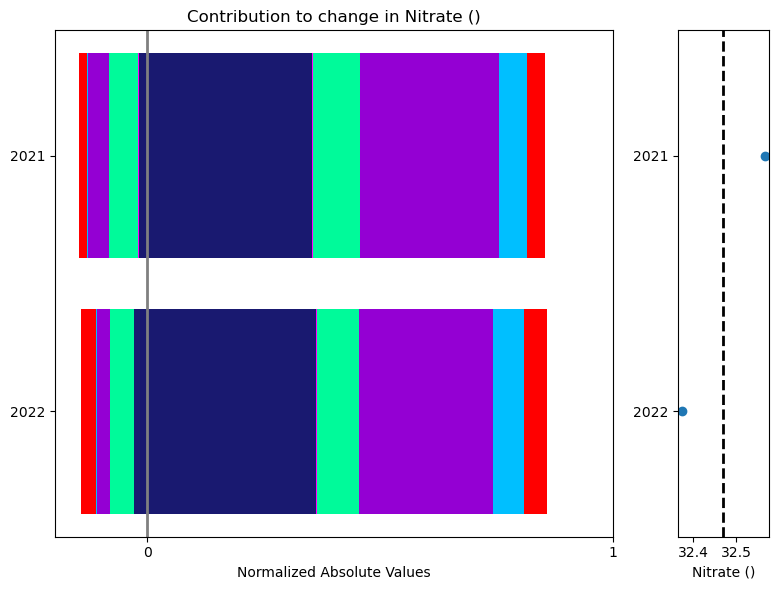

In [52]:
df = pd.concat([math_up21[['year','section','no3P','no3Q']][1:],math_up22[['year','section','no3P','no3Q']][1:]])
ax2 = stacked_bar(df,'Nitrate ()')

# mean property inflow to JdF
ax2.scatter([up21.NO3[0],up22.NO3[0]], [2021,2022])
ax2.axvline(up_b.NO3[0], color='k', ls='dashed', linewidth=2)
ax2.set_xlabel('Nitrate ()')
# ax2.set_xlim([33.4,33.45])
# ax2.set_xticks([33.41,33.44])

/tmp/ipykernel_87713/2093005159.py:233: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


Text(0.5, 36.72222222222221, 'TA ()')

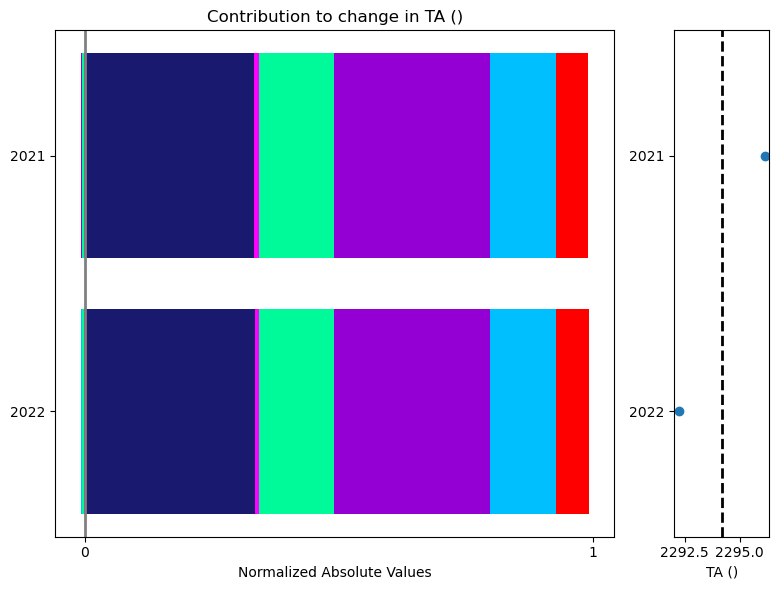

In [53]:
df = pd.concat([math_up21[['year','section','taP','taQ']][1:],math_up22[['year','section','taP','taQ']][1:]])
ax2 = stacked_bar(df,'TA ()')

# mean property inflow to JdF
ax2.scatter([up21.TA[0],up22.TA[0]], [2021,2022])
ax2.axvline(up_b.TA[0], color='k', ls='dashed', linewidth=2)
ax2.set_xlabel('TA ()')
# ax2.set_xlim([33.4,33.45])
# ax2.set_xticks([33.41,33.44])

/tmp/ipykernel_87713/2093005159.py:233: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


Text(0.5, 36.72222222222221, 'DIC ()')

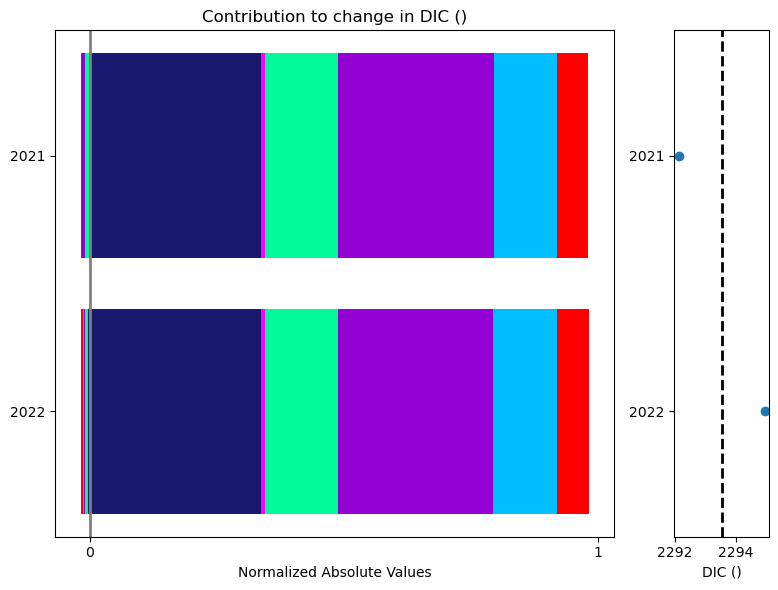

In [54]:
df = pd.concat([math_up21[['year','section','dicP','dicQ']][1:],math_up22[['year','section','dicP','dicQ']][1:]])
ax2 = stacked_bar(df,'DIC ()')

# mean property inflow to JdF
ax2.scatter([up21.DIC[0],up22.DIC[0]], [2021,2022])
ax2.axvline(up_b.DIC[0], color='k', ls='dashed', linewidth=2)
ax2.set_xlabel('DIC ()')
# ax2.set_xlim([33.4,33.45])
# ax2.set_xticks([33.41,33.44])

## Downwelling

In [15]:
dw20 = means(xr.open_dataset('/data1/bbeutel/LO_user/ariane/down_cas7/S_T/20210202/ariane_positions_quantitative.nc'),
             xr.open_dataset('/data1/bbeutel/LO_user/ariane/down_cas7/DO_NO3/20210202/ariane_positions_quantitative.nc'),
             xr.open_dataset('/data1/bbeutel/LO_user/ariane/down_cas7/TA_DIC/20210202/ariane_positions_quantitative.nc'))

dw21 = means(xr.open_dataset('/data1/bbeutel/LO_user/ariane/down_cas7/S_T/20220125/ariane_positions_quantitative.nc'),
             xr.open_dataset('/data1/bbeutel/LO_user/ariane/down_cas7/DO_NO3/20220125/ariane_positions_quantitative.nc'),
             xr.open_dataset('/data1/bbeutel/LO_user/ariane/down_cas7/TA_DIC/20220125/ariane_positions_quantitative.nc'))


In [16]:
# make 'baseline' dataframe based on the means of all the data
d = {'section':['total', 'loop', 'fresh', 'south', 'cuc', 'off_d', 'off_s', 'north'],
     'transport':np.mean([dw20.transport,dw21.transport],axis=0),
     'salt':np.mean([dw20.salt,dw21.salt],axis=0),
     'temp':np.mean([dw20.temp,dw21.temp],axis=0),
     'DO':np.mean([dw20.DO,dw21.DO],axis=0),
     'NO3':np.mean([dw20.NO3,dw21.NO3],axis=0),
     'TA':np.mean([dw20.TA,dw21.TA],axis=0),
     'DIC':np.mean([dw20.DIC,dw21.DIC],axis=0)}
dw_b = pd.DataFrame(d)

dw_b

,section,transport,salt,temp,DO,NO3,TA,DIC
0,total,153003.945021,32.132513,8.118306,175.257047,24.649795,2235.237352,2177.819547
1,loop,63143.789950,31.761881,8.058454,183.434774,27.982606,2214.099963,2172.636519
2,fresh,24624.069244,30.107701,9.947189,286.086744,9.077648,2161.739181,2004.644953
3,south,34428.797681,32.759995,9.114999,192.726374,17.748070,2264.865116,2170.303756
4,cuc,22170.921370,33.756888,6.587974,74.549034,35.301569,2311.665686,2310.976980
5,off_d,3593.604818,33.544868,6.846546,109.205129,30.645829,2299.198919,2272.731504
6,off_s,3048.838434,32.756176,9.121788,210.537085,14.545934,2261.657563,2144.714996
7,north,1993.923524,32.782533,9.026203,187.598773,17.450959,2262.273510,2170.174696


In [17]:
# math! 
math_dw20 = decomp(dw20,dw_b)[1:]
math_dw21 = decomp(dw21,dw_b)[1:]

# add year 
math_dw20['year'] = 2020
math_dw21['year'] = 2021

/tmp/ipykernel_87713/2093005159.py:233: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


Text(0.5, 36.72222222222221, 'Salinity (g/kg)')

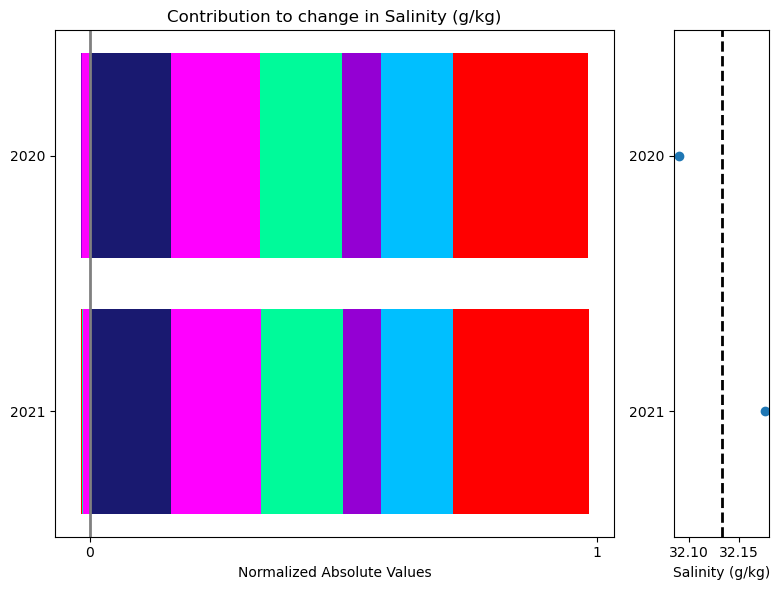

In [55]:
df = pd.concat([math_dw20[['year','section','saltP','saltQ']][1:],math_dw21[['year','section','saltP','saltQ']][1:]])
ax2 = stacked_bar(df,'Salinity (g/kg)')

# mean property inflow to JdF
ax2.scatter([dw20.salt[0],dw21.salt[0]], [2020,2021])
ax2.axvline(dw_b.salt[0], color='k', ls='dashed', linewidth=2)
ax2.set_xlabel('Salinity (g/kg)')
# ax2.set_xlim([33.4,33.45])
# ax2.set_xticks([33.41,33.44])

/tmp/ipykernel_87713/2093005159.py:233: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


Text(0.5, 36.72222222222221, 'Temperature ($^\\circ C$)')

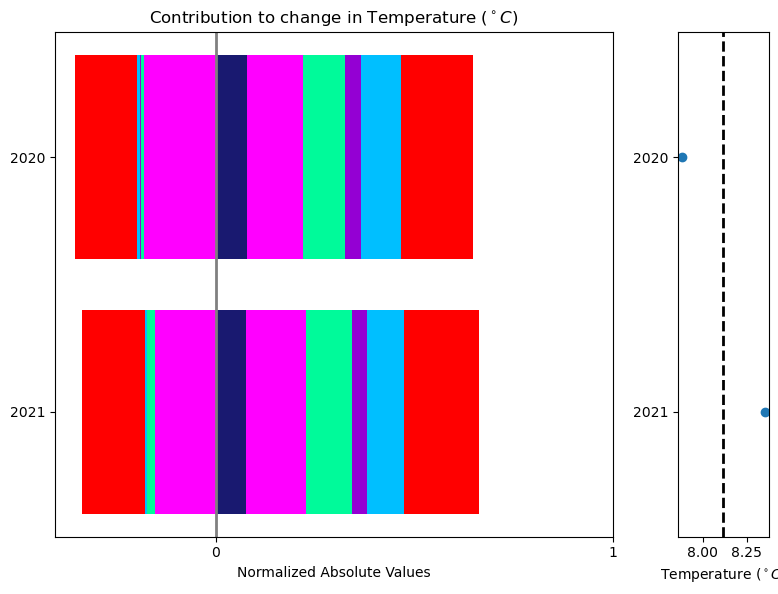

In [56]:
col = ['year','section','tempP','tempQ']
df = pd.concat([math_dw20[col][1:],math_dw21[col][1:]])
ax2 = stacked_bar(df,'Temperature ($^\circ C$)')

# mean property inflow to JdF
ax2.scatter([dw20.temp[0],dw21.temp[0]], [2020,2021])
ax2.axvline(dw_b.temp[0], color='k', ls='dashed', linewidth=2)
ax2.set_xlabel('Temperature ($^\circ C$)')

/tmp/ipykernel_87713/2093005159.py:233: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


Text(0.5, 36.72222222222221, 'DO ()')

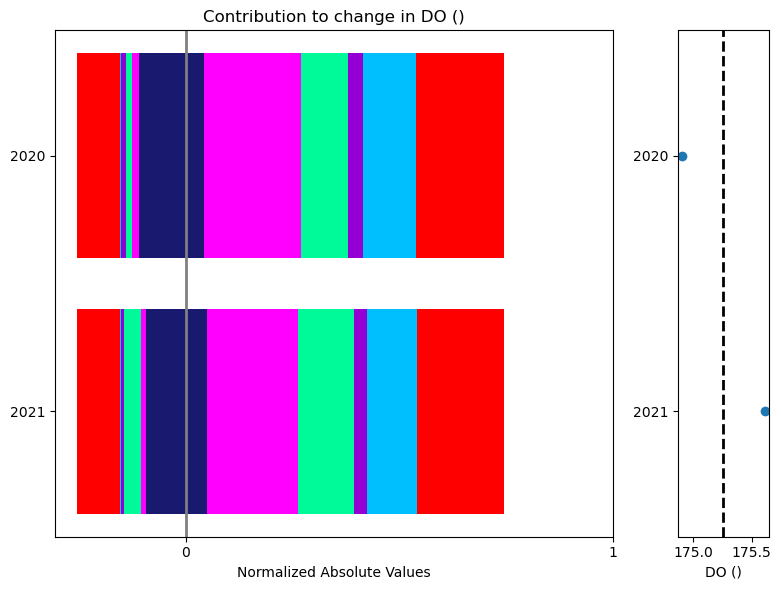

In [57]:
col = ['year','section','doP','doQ']
df = pd.concat([math_dw20[col][1:],math_dw21[col][1:]])
ax2 = stacked_bar(df,'DO ()')

# mean property inflow to JdF
ax2.scatter([dw20.DO[0],dw21.DO[0]], [2020,2021])
ax2.axvline(dw_b.DO[0], color='k', ls='dashed', linewidth=2)
ax2.set_xlabel('DO ()')

/tmp/ipykernel_87713/2093005159.py:233: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


Text(0.5, 36.72222222222221, 'Nitrate ()')

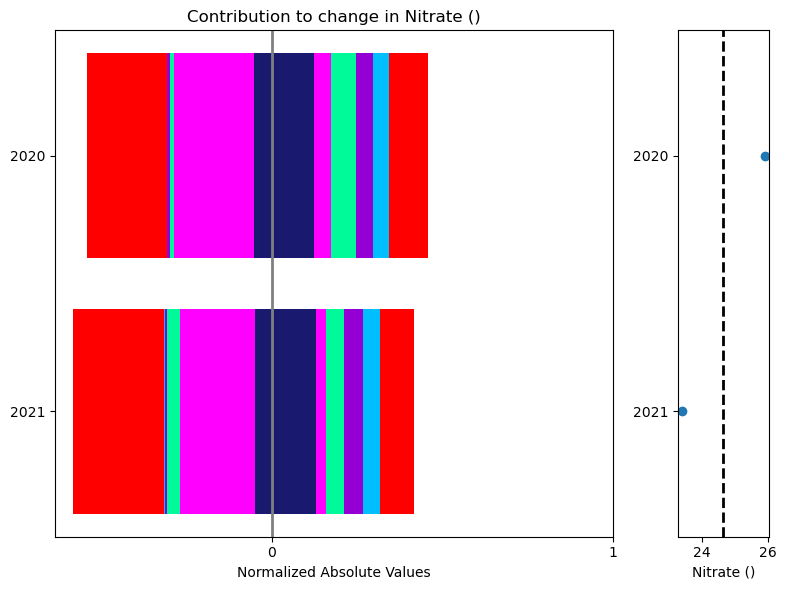

In [58]:
col = ['year','section','no3P','no3Q']
df = pd.concat([math_dw20[col][1:],math_dw21[col][1:]])
ax2 = stacked_bar(df,'Nitrate ()')

# mean property inflow to JdF
ax2.scatter([dw20.NO3[0],dw21.NO3[0]], [2020,2021])
ax2.axvline(dw_b.NO3[0], color='k', ls='dashed', linewidth=2)
ax2.set_xlabel('Nitrate ()')

/tmp/ipykernel_87713/2093005159.py:233: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


Text(0.5, 36.72222222222221, 'TA ()')

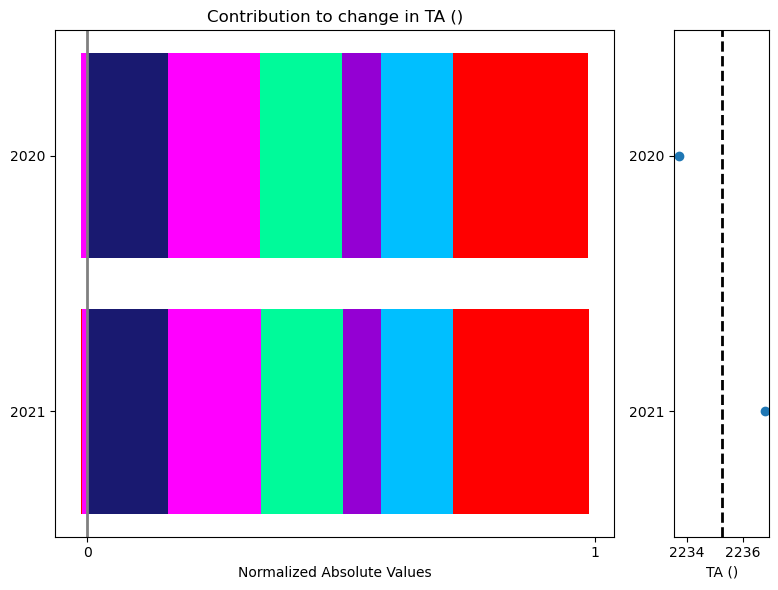

In [59]:
col = ['year','section','taP','taQ']
df = pd.concat([math_dw20[col][1:],math_dw21[col][1:]])
ax2 = stacked_bar(df,'TA ()')

# mean property inflow to JdF
ax2.scatter([dw20.TA[0],dw21.TA[0]], [2020,2021])
ax2.axvline(dw_b.TA[0], color='k', ls='dashed', linewidth=2)
ax2.set_xlabel('TA ()')

/tmp/ipykernel_87713/2093005159.py:233: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


Text(0.5, 36.72222222222221, 'DIC ()')

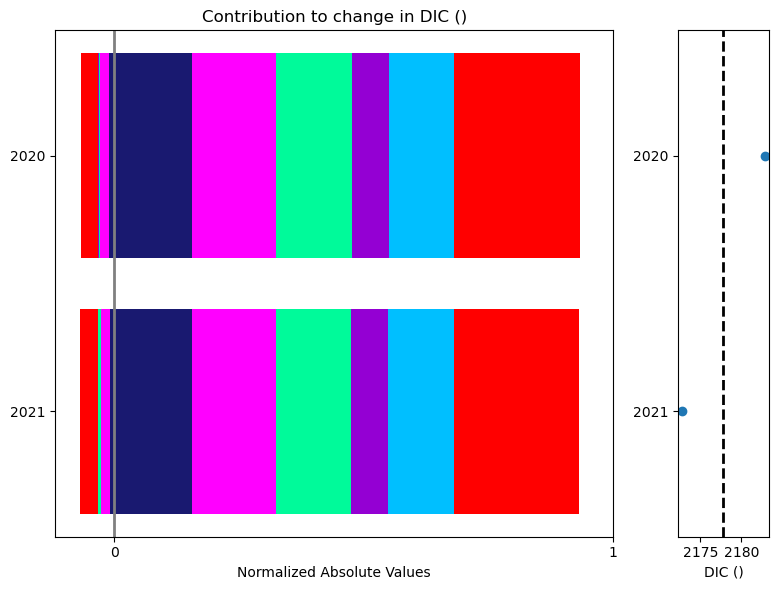

In [60]:
col = ['year','section','dicP','dicQ']
df = pd.concat([math_dw20[col][1:],math_dw21[col][1:]])
ax2 = stacked_bar(df,'DIC ()')

# mean property inflow to JdF
ax2.scatter([dw20.DIC[0],dw21.DIC[0]], [2020,2021])
ax2.axvline(dw_b.DIC[0], color='k', ls='dashed', linewidth=2)
ax2.set_xlabel('DIC ()')